In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def pca_plot(data):
    pca = PCA(n_components=2)
    pca.fit(data.data)
    data_pca = pca.transform(data.data)

    for label in range(len(data.target_names)):
        plt.scatter(data_pca[data.target==label, 0],
                    data_pca[data.target==label, 1],
                    label=data.target_names[label])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Supervised Learning

Supervised learning consists in learning the link between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length n_samples.

If the prediction task is to classify the observations in a set of finite labels, in other words to “name” the objects observed, the task is said to be a **classification** task. On the other hand, if the goal is to predict a continuous target variable, it is said to be a **regression** task.

Clustering, which we've just done with K means, is a type of *unsupervised* learning similar to classification. Here, the difference is that we'll be using the labels in our data in our algorithm.

## Classification

"The problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known." (Wikipedia)

We've seen one classification example already, the iris dataset. In this dataset, iris flowers are classified based on their petal and sepal geometries.

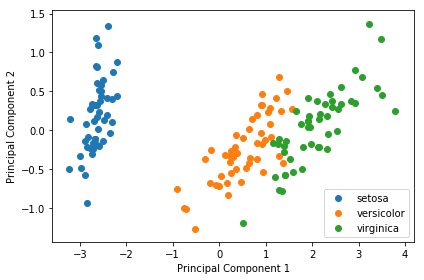

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
pca_plot(iris)

Another dataset with more features is the wine classification dataset, which tries to determine the original cultivar, or plant family, of three different Italian wines. A chemical analysis determined the following samples:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

which can be used to classify the wine.

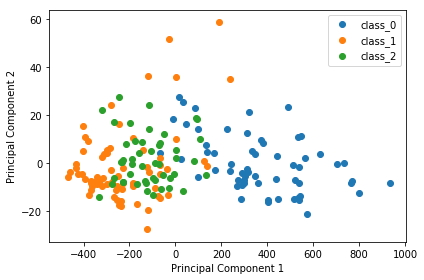

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
pca_plot(wine)

A final and more difficult dataset is a sample from the National Institute of Standards and Technology (NIST) dataset on handwritten numbers. A modified and larger version of this, Modified NIST or MNIST, is a current standard benchmark for state of the art machine learning algorithms. In this problem, each datapoint is an 8x8 pixel image (64 features) and the classification task is to label each image as the correct number.

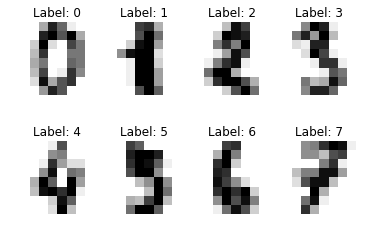

In [4]:
from sklearn.datasets import load_digits

digits = load_digits()
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

plt.show()

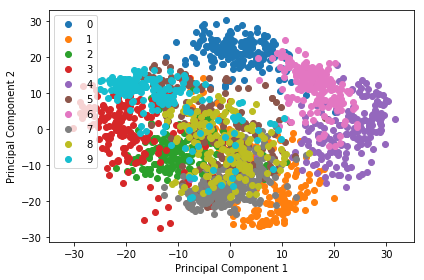

In [5]:
pca_plot(digits)

## Regression

"In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors'). More specifically, regression analysis helps one understand how the typical value of the dependent variable (or 'criterion variable') changes when any one of the independent variables is varied, while the other independent variables are held fixed." (Wikipedia)

In regression, each set of features doesn't correspond to a label but rather to a value. The task of the regression algorithm is to correctly predict this value based on the feature data. One way to think about regression and classification is that regression is continuous while classification is discrete.

Scikit learn also comes with a number of sample regression datasets.

The first is the boston housing data. This regression dataset is used to predict the median value of a home in the suburbs of Boston given information about the neighborhood and house:

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of African Americans by town
13. LSTAT    lower status of the population

Target: MEDV     Median value of owner-occupied homes in $1000's

Here the y axis indicates the value that we want to predict:

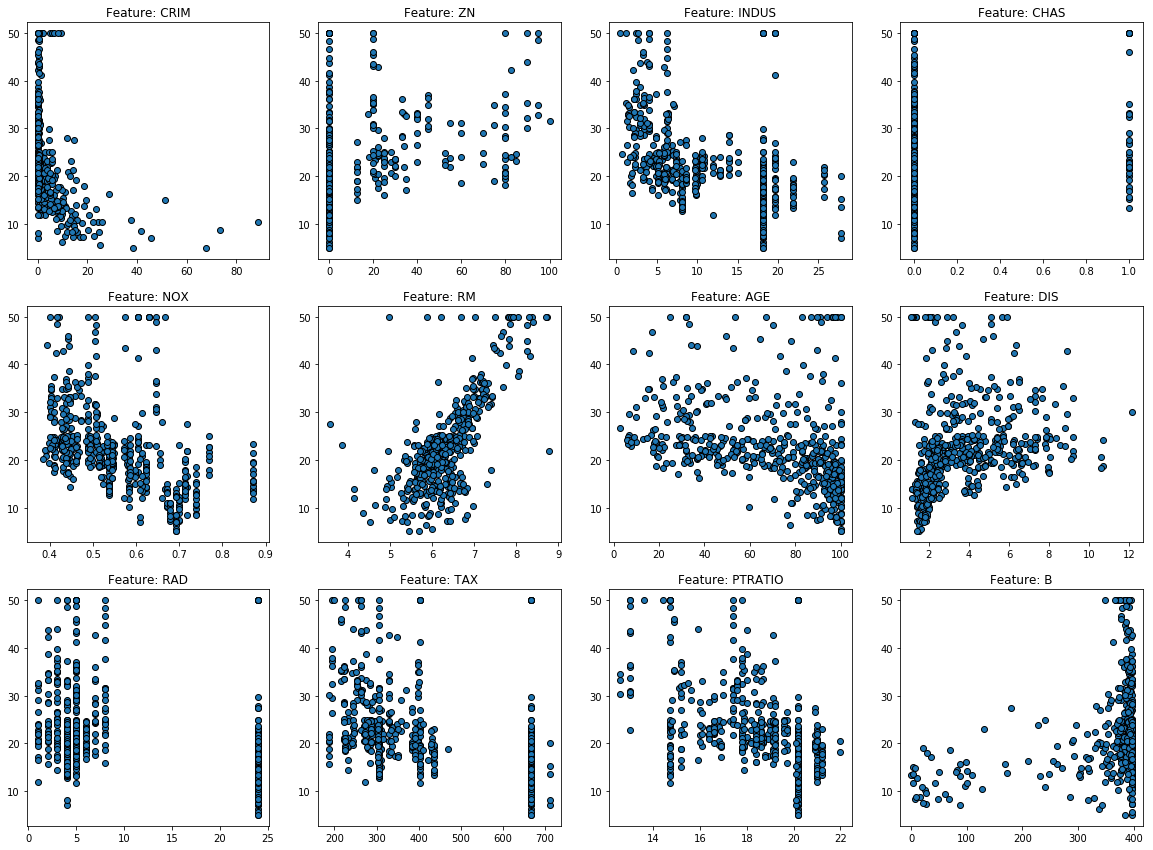

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
y = boston.target
plt.figure(figsize=(20,20))
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.scatter(boston.data[:, i], y, edgecolors=(0, 0, 0));
    plt.title('Feature: %s' % features[i])
plt.show()

In our final example dataset, health metrics of diabetes patients were measured and then the progress of their diabetes was quantitatively measured after 1 year. The features are:

1. age
2. sex
3. body mass index
4. average blood pressure
+ 5-10 six blood serum measurements

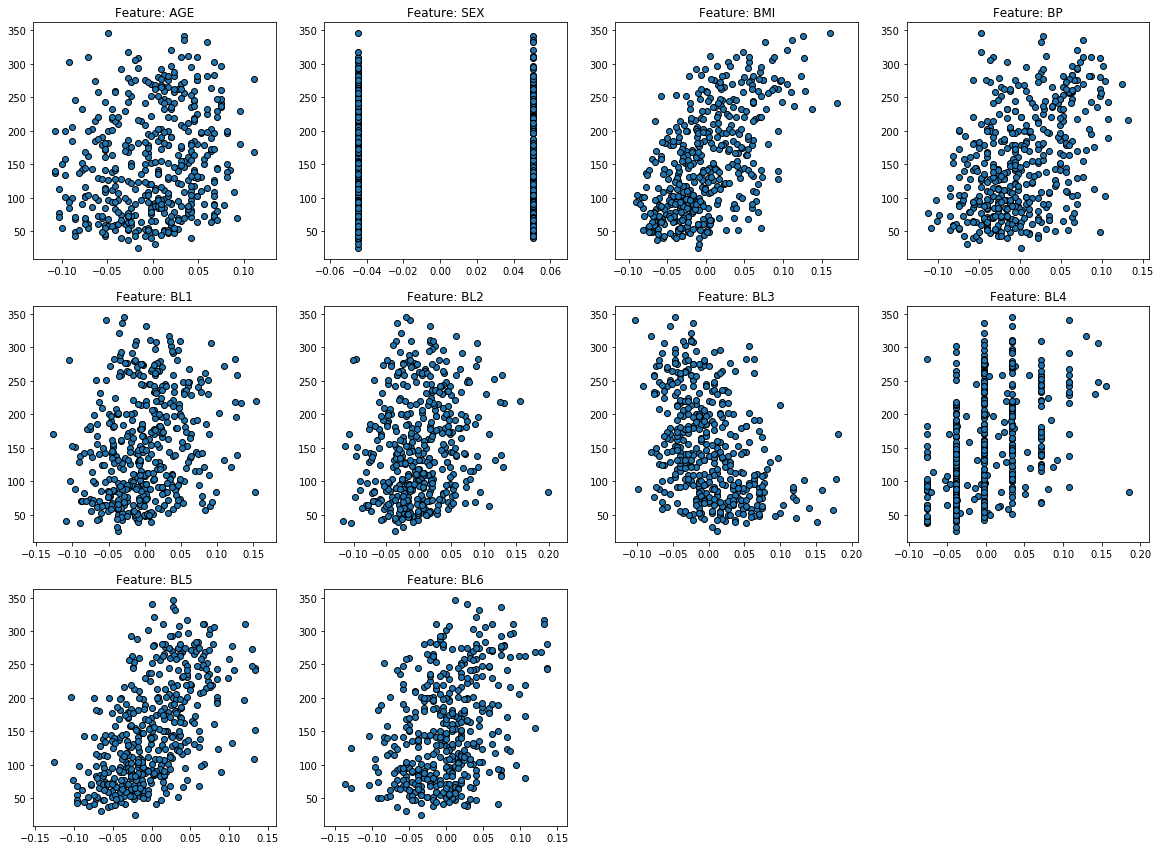

In [7]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
y = diabetes.target
plt.figure(figsize=(20,20))
features = ["AGE", "SEX", "BMI", "BP", "BL1", "BL2", "BL3", "BL4", "BL5", "BL6"]
for i in range(10):
    plt.subplot(4, 4, i + 1)
    plt.scatter(diabetes.data[:, i], y, edgecolors=(0, 0, 0));
    plt.title('Feature: %s' % features[i])

<div class="alert alert-success">
    <b>EXERCISE: UCI datasets</b>
     <ul>
      <li>
Many of these datasets originally come from the UCI Machine Learning Repository. Visit https://archive.ics.uci.edu/ml/index.php and select a dataset. What is the dataset describing? What are the features? Is it classification or regression? How many data samples are there?
      </li>
    </ul>
</div>